In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
store = pd.read_csv("store.csv")
train = pd.read_csv("train.csv",parse_dates=[2])
test = pd.read_csv("test.csv",parse_dates=[3])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [5]:
store.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [6]:
store.fillna(0, inplace=True)

In [7]:
train.head().append(train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
train.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [10]:
np.sum([train['Sales'] == 0])

172871

Text(0.5, 1.0, 'Store 10 Sales Distribution')

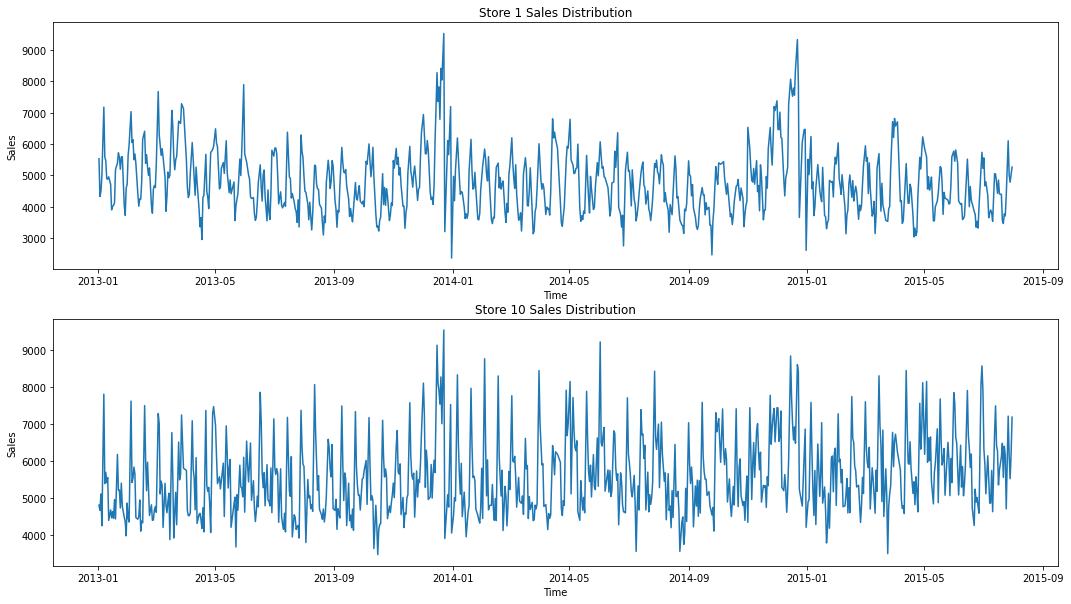

In [11]:
import matplotlib.pyplot as plt
store_1 = train.loc[(train["Store"]==1)&(train['Sales']>0), ['Date',"Sales"]]
store_10 = train.loc[(train["Store"]==10)&(train['Sales']>0), ['Date',"Sales"]]
f = plt.figure(figsize=(18,10))
ax1 = f.add_subplot(211)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Sales Distribution')

ax2 = f.add_subplot(212)
ax2.plot(store_10['Date'], store_10['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Sales Distribution')

In [12]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [13]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Text(0.5, 1.0, 'Store Daily Open Countplot')

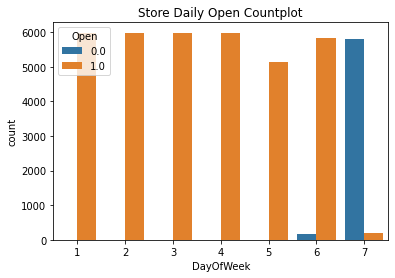

In [17]:

sns.countplot(x = 'DayOfWeek', hue = 'Open', data = test)
plt.title('Store Daily Open Countplot')

In [15]:
test[test.Open.isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [18]:
test.fillna(value = 1, inplace = True)

In [19]:
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

train = train.sort_values(['Date'],ascending = False)
train_total = train.copy()

split_index = 6*7*1115
valid = train[:split_index] 
train = train[split_index:]

valid = valid[(valid.Open != 0)&(valid.Sales >0)]
train = train[(train.Open != 0)&(train.Sales >0)]
train_total = train_total[(train_total.Open != 0)&(train_total.Sales >0)]

In [20]:
def process(data, isTest = False):
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
  
    data['Month'] = data.Date.dt.month
    data['Year'] = data.Date.dt.year
    data['Day'] = data.Date.dt.day
    data['WeekOfYear'] = data.Date.dt.weekofyear
 
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + \
        (data.Month - data.CompetitionOpenSinceMonth)
    data['CompetitionOpen'] = data['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)
    
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + \
     (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['PromoOpen'] = data['PromoOpen'].apply(lambda x: x if x > 0 else 0)
     
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['month_str'] = data.Month.map(month2str)

    def check(row):
        if isinstance(row['PromoInterval'],str) and row['month_str'] in row['PromoInterval']:
            return 1
        else:
            return 0
        
    data['IsPromoMonth'] =  data.apply(lambda row: check(row),axis=1)    

    features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
                 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth']  
    if not isTest:
        features.append('Sales')
        
    data = data[features]
    return data

train = process(train)
valid = process(valid)
train_total = process(train_total)
x_test = process(test,isTest = True)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [21]:
valid.sort_index(inplace = True)
train.sort_index(inplace = True)
train_total.sort_index(inplace = True)


x_train, y_train = train.drop(columns = ['Sales']), np.log1p(train['Sales'])
x_valid, y_valid = valid.drop(columns = ['Sales']), np.log1p(valid['Sales'])
x_train_total, y_train_total = train_total.drop(columns = ['Sales']), np.log1p(train_total['Sales'])

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
  

In [26]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(x_train, y_train)

In [27]:
print("Regresion Model Score" , ":" , rdfreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(x_valid, y_valid))   

yl_predicted = rdfreg.predict(x_train)
yl_test_predicted = rdfreg.predict(x_valid)

print("Training RMSE", ":", rmse(y_train, yl_predicted),
      "Testing RMSE", ":", rmse(y_valid, yl_test_predicted))
print("Training MAPE", ":", mape(y_train, yl_predicted),
      "Testing MAPE", ":", mape(y_valid, yl_test_predicted))

Regresion Model Score : 0.9878785473857228 , Out of Sample Test Score : 0.8854650202753237
Training RMSE : 0.04686296960762483 Testing RMSE : 0.14081451285358754
Training MAPE : 0.36558650028573525 Testing MAPE : 1.2173991033022742


Text(0.5, 1.0, 'Feature Importance')

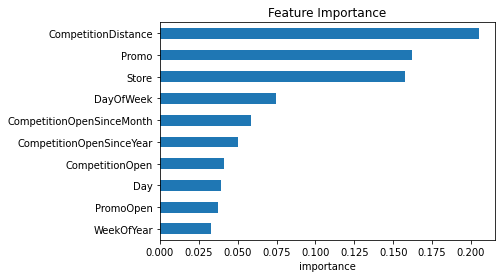

In [28]:
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [31]:
import xgboost as xgb

params = {"objective": "reg:linear",
          "booster" : "gbtree",  
          "eta": 0.03,   
          "max_depth": 10,   
          "subsample": 0.9,    
          "colsample_bytree": 0.7,  
          "silent": 1,  
          "seed": 10  
          }
num_boost_round = 400

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)


[0]	train-rmse:8.02074	eval-rmse:8.02783	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.78063	eval-rmse:7.78784	train-rmspe:0.999711	eval-rmspe:0.999714
[2]	train-rmse:7.54784	eval-rmse:7.55441	train-rmspe:0.99959	eval-rmspe:0.999595
[3]	train-rmse:7.32187	eval-rmse:7.32809	train-rmspe:0.999443	eval-rmspe:0.999449
[4]	train-rmse:7.10286	eval-rmse:7.1073	train-rmspe:0.999266	eval-rmspe:0.999272
[5]	train-rmse:6.89032	eval-rmse:6.89425	train-rmspe:0.999052	eval-rmspe:0.99906
[6]	train-rmse:6.68423	eval-rmse:6.68674	train-rmspe:0.998797	eval-rmspe:0.998805
[7]	train-rmse:6.48425	eval-rmse:6.48719	train-rmspe:0.998494	eval-rmspe:0.998506
[8]	train-rmse:6.29026	eval-rmse:6.29359	train-rmspe:0.998138	eval-rmspe:0.998153
[9]	train-rmse:6.10209	eval-rmse:6.10611	train-rmspe:0.99772	eval-rmspe:0.99774
[10]	train-rmse:5.91965	eval-rmse:5.923

In [32]:
yl_predicted = model.predict(xgb.DMatrix(x_train))
yl_test_predicted = model.predict(xgb.DMatrix(x_valid))

print("Training RMSE", ":", rmse(y_train, yl_predicted),
      "Testing RMSE", ":", rmse(y_valid, yl_test_predicted))
print("Training MAPE", ":", mape(y_train, yl_predicted),
      "Testing MAPE", ":", mape(y_valid, yl_test_predicted))

Training RMSE : 0.13125141025594728 Testing RMSE : 0.1538677272767056
Training MAPE : 1.1237226548193635 Testing MAPE : 1.356352054536483


In [33]:
x_train_total.head().append(x_train_total.tail())

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,5,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31,31,82.0,24187.75,0
1,1,4,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,30,31,82.0,24187.75,0
2,1,3,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,29,31,82.0,24187.75,0
3,1,2,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,28,31,82.0,24187.75,0
4,1,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,27,31,82.0,24187.75,0
1017202,1115,1,1,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,7,2,24157.0,7.00,0
1017204,1115,6,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,5,1,24157.0,6.75,0
1017205,1115,5,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,4,1,24157.0,6.75,0
1017206,1115,4,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,3,1,24157.0,6.75,0
1017207,1115,3,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,2,1,24157.0,6.75,0


In [34]:
print(x_train_total.shape)
print(y_train_total.shape)

(844338, 20)
(844338,)


In [35]:
dtrain = xgb.DMatrix(x_train_total, y_train_total)
dtest = xgb.DMatrix(x_test)

params = {"objective": "reg:linear", 
          "booster" : "gbtree",    
          "eta": 0.03,  
          "max_depth": 10,   
          "subsample": 0.9,    
          "colsample_bytree": 0.7,  
          "silent": 1,  
          "seed": 10   
          }
num_round = 200
model = xgb.train(params, dtrain, num_round)
preds = model.predict(dtest)


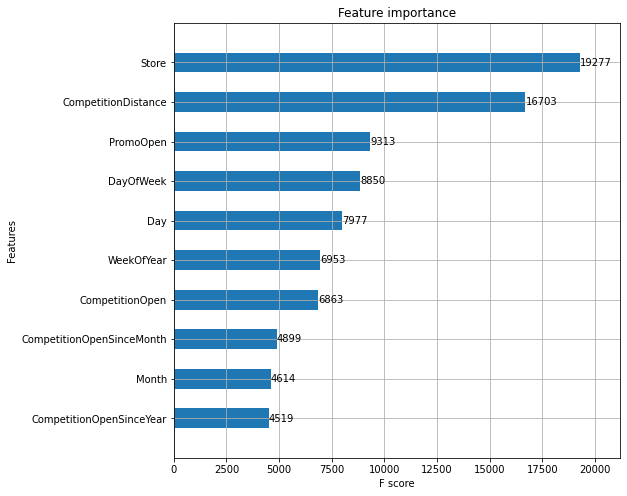

In [36]:
result = pd.DataFrame({"Id": test["Id"],'Sales': np.expm1(preds*0.995)})
result.to_csv("submission_xgb.csv", index=False)
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
plt.show()